# Module 3: Image Segmentation - Part 1: Thresholding

[Image segmentation](https://en.wikipedia.org/wiki/Image_segmentation) is the process of partitioning sets of image pixels into groups (e.g. foreground and background). In this module we will explore different image segmentation approaches, including thresholding, edge detection, clustering, and machine learning.

In [1]:
%matplotlib inline
import matplotlib
from plantcv import plantcv as pcv

In [2]:
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

In [3]:
pcv.__version__

'3.13.2'

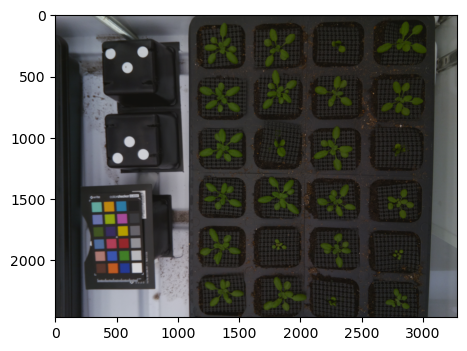

In [4]:
# Open image file
color_img, imgpath, imgname = pcv.readimage(filename="./images/10.9.1.230_pos-165-001-004_2019-11-01-10-05.jpg")

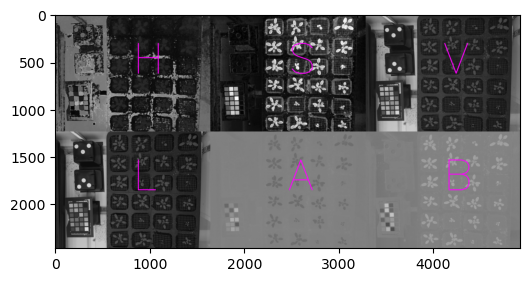

In [5]:
# Visualize component HSV and LAB color spaces
cs = pcv.visualize.colorspaces(rgb_img=color_img, original_img=False)

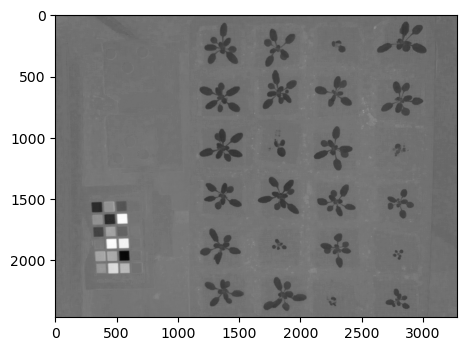

In [6]:
# Convert the RGB image into a grayscale image by choosing one of the HSV or LAB channels
grayscale_img = pcv.rgb2gray_lab(rgb_img=color_img, channel="a")

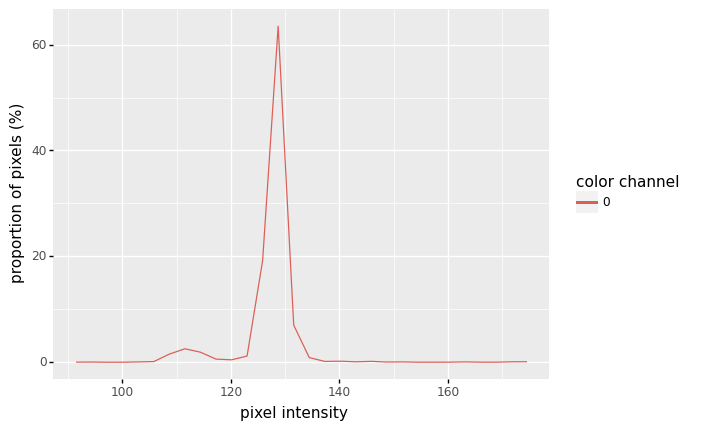

In [7]:
# Visualize a histogram of the grayscale values to identify signal related to the plant and the background
hist = pcv.visualize.histogram(img=grayscale_img, bins=30)

### Manually set a binary threshold

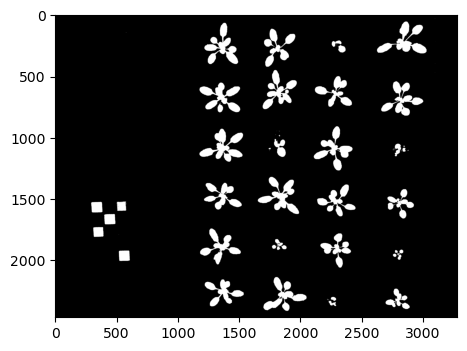

In [8]:
# Use the histogram to set a binary threshold where the plant pixels will be labeled white and the background will be labeled black
set_thresh = pcv.threshold.binary(gray_img=grayscale_img, threshold=120, max_value=255, object_type="dark")

### Automatically set a binary threshold

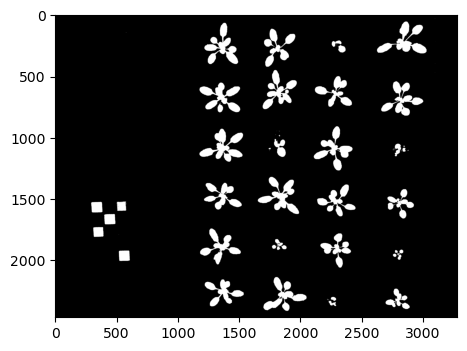

In [9]:
# Instead of setting a manual threshold, try an automatic threshold method such as Otsu
auto_thresh = pcv.threshold.otsu(gray_img=grayscale_img, max_value=255, object_type="dark")

### 3D threshold in RGB colorspace

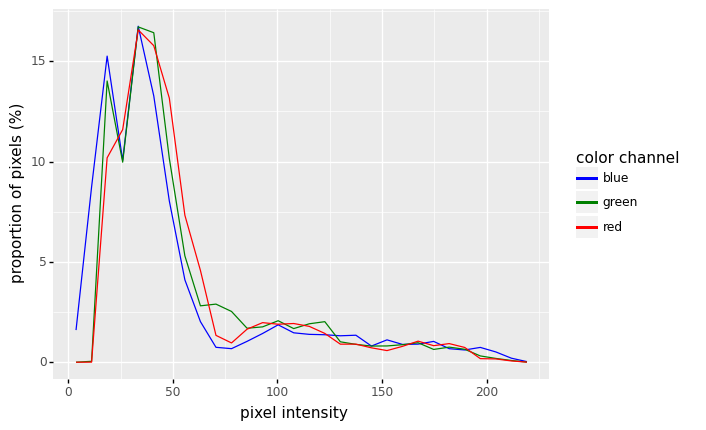

In [10]:
# Visualize a histogram of the RGB values to identify signal related to the plant and the background
rgb_hist = pcv.visualize.histogram(img=color_img, bins=30)

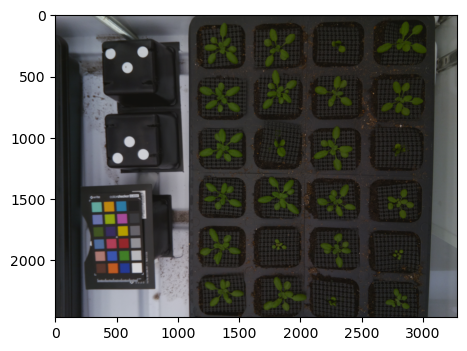

In [11]:
# Plot the input image for selecting RGB values
pcv.plot_image(color_img)

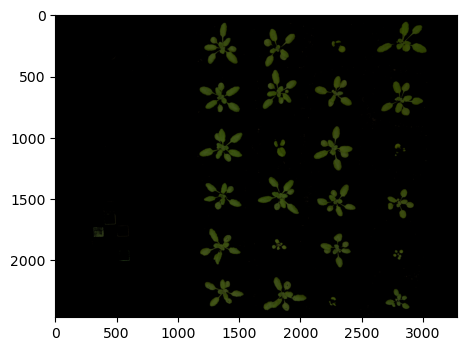

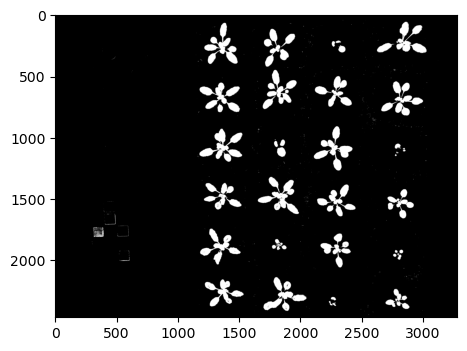

In [12]:
# Use the custom_range threshold to segment colors in 3D RGB colorspace
rgb_thresh, _ = pcv.threshold.custom_range(img=color_img, lower_thresh=[40, 50, 0], upper_thresh=[75, 95, 35], channel="rgb")

### Compare results

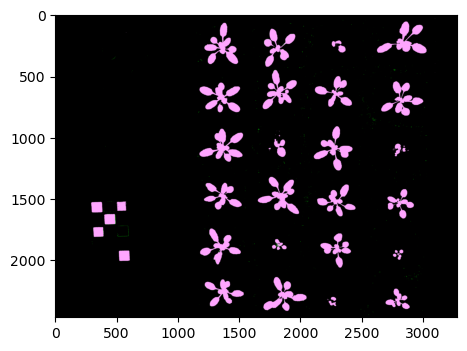

In [13]:
merged_thresh = pcv.visualize.colorize_masks(masks=[set_thresh, auto_thresh, rgb_thresh], colors=["blue", "orange", "green"])